In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

import keras.losses
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping


# DATA SOURCE --------------------------------------------------

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

train_data_dir =  "/content/drive/My Drive/Colab Notebooks/datos fsi/train"
validation_data_dir =  "/content/drive/My Drive/Colab Notebooks/datos fsi/validation"



num_of_classes = len(os.listdir(train_data_dir))


batch_size = 8
epochs = 100
size = (224, 224)
class_mode = 'categorical'

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    # validation_split=0.1,
    horizontal_flip=True,
    vertical_flip=True,
)

valid_datagen = ImageDataGenerator(
    rescale=1. / 255
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    shuffle=True,
    target_size=size,
    # subset='training',
    batch_size=batch_size,
    class_mode=class_mode)

validation_generator = valid_datagen.flow_from_directory(
    validation_data_dir,
    shuffle=False,
    # subset='validation',
    target_size=size,
    class_mode=class_mode)




Found 643 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
# MODEL --------------------------------------------------

model = Sequential(
    [
        Conv2D(128, kernel_size=3, activation='relu', input_shape=(size[0], size[1], 3)),
        MaxPooling2D(pool_size=2),

        Conv2D(256, kernel_size=3, activation='relu'),
        MaxPooling2D(pool_size=2),

        Conv2D(256, kernel_size=3, activation='relu'),
        MaxPooling2D(pool_size=2),

        Conv2D(512, kernel_size=3, activation='relu'),
        MaxPooling2D(pool_size=2),

        Conv2D(512, kernel_size=3, activation='relu'),
        MaxPooling2D(pool_size=2),

        Conv2D(1024, kernel_size=3, activation='relu'),
        MaxPooling2D(pool_size=2),

        Flatten(),
        Dropout(0.2),
        Dense(4096, activation='relu'),
        Dropout(0.6),
        Dense(2048, activation='relu'),
        Dropout(0.5),

        Dense(num_of_classes, activation='softmax')
    ]
)

print(model.summary())

model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.2),
            metrics=['accuracy'])



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 111, 111, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 109, 109, 256)     295168    
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 54, 54, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 52, 52, 256)       590080    
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 26, 26, 256)     

EXPLICAR CROSSENTROPY

In [ ]:
# TRAINING --------------------------------------------------

early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, restore_best_weights=True)



h = model.fit(
  train_generator,
  validation_data=validation_generator,
  callbacks=[early_stop],
  epochs=epochs
  )


model.save("model.h5")

Epoch 1/100
81/81 [==============================] - 24s 265ms/step - loss: 1.6017 - accuracy: 0.2177 - val_loss: 1.4749 - val_accuracy: 0.4100
Epoch 2/100
81/81 [==============================] - 15s 185ms/step - loss: 1.4611 - accuracy: 0.3748 - val_loss: 1.4338 - val_accuracy: 0.3700
Epoch 3/100
81/81 [==============================] - 15s 183ms/step - loss: 1.3091 - accuracy: 0.4028 - val_loss: 1.4186 - val_accuracy: 0.3200
Epoch 4/100
81/81 [==============================] - 15s 185ms/step - loss: 1.1799 - accuracy: 0.4666 - val_loss: 1.3629 - val_accuracy: 0.4600
Epoch 5/100
81/81 [==============================] - 15s 186ms/step - loss: 1.0780 - accuracy: 0.5381 - val_loss: 1.1024 - val_accuracy: 0.5500
Epoch 6/100
81/81 [==============================] - 21s 261ms/step - loss: 1.0196 - accuracy: 0.5739 - val_loss: 1.0425 - val_accuracy: 0.6000
Epoch 7/100
81/81 [==============================] - 16s 194ms/step - loss: 0.9307 - accuracy: 0.6267 - val_loss: 0.9863 - val_accuracy:

# Nueva sección

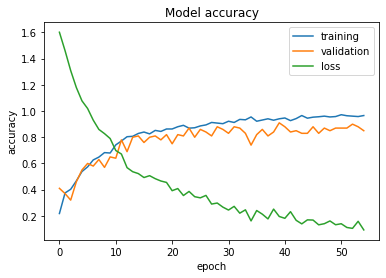

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

### MATRIZ DE CONFUSIÓN

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Y_pred = model.predict_generator(validation_generator, validation_generator.n // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ["basketball", "bowling ball", "football", "tennis ball", "volley ball"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Confusion Matrix
[[16  2  0  2  0]
 [ 0 18  0  0  2]
 [ 0  0 20  0  0]
 [ 0  0  0 20  0]
 [ 1  2  0  0 17]]
Classification Report
              precision    recall  f1-score   support

  basketball       0.94      0.80      0.86        20
bowling ball       0.82      0.90      0.86        20
    football       1.00      1.00      1.00        20
 tennis ball       0.91      1.00      0.95        20
 volley ball       0.89      0.85      0.87        20

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

